In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
# from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import r_regression

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback.csv',index_col=0)
ratings.head()

,NAME,Year,DR. Pattabiraman\nInstructor's Teaching Style,DR. Umitty Srinivasa Rao\nInstructor's Teaching Style,DR. Devi Yamini\nInstructor's Teaching Style,DR. Aswiga\nInstructor's Teaching Style,DR. Malini Deepika\nInstructor's Teaching Style,DR. Pattabiraman\nProject Component Management,DR. Malini Deepika\nProject Component Management,DR. Pattabiraman\nAdditional Comments,DR. Umitty Srinivasa Rao\nAdditional Comments,DR. Devi Yamini\nAdditional Comments,DR. Aswiga\nAdditional Comments,DR. Malini Deepika\nAdditional Comments,DR. Pattabiraman\nStudent Recommendation,DR. Umitty Srinivasa Rao\nStudent Recommendation,DR. Devi Yamini\nStudent Recommendation,DR. Aswiga\nStudent Recommendation,DR. Malini Deepika\nStudent Recommendation
Timestamp,,,,,,,,,,,,,,,,,,,
4-22-2024 22:07:51,Pavithra,2nd,5,5,5,5,4,5,5,Excellent teaching,Clear teaching,Explained lectures,Clear lectures,Good lecture,Yes,Yes,Yes,Yes,Yes
4-22-2024 22:08:32,Jasmitha Manali,2nd year,5,5,5,4,4,5,5,Comments,Comments,Comments,Comments,Comments,Yes,Yes,Yes,Yes,Yes
4-22-2024 22:14:34,Harish,2nd,4,1,3,5,2,4,5,Comments,Comments,other,Comments,Comments,Yes,Yes,Yes,Yes,Yes
4-22-2024 22:16:13,Sheela,2nd,5,5,5,5,5,5,4,Comments,Comments,other,Comments,Comments,Yes,Yes,No,No,No
4-22-2024 22:16:57,Kiran,2nd,5,2,2,2,1,5,3,Comments,Comments,other,Comments,Comments,No,Yes,No,Yes,Yes


In [ ]:
ratings = ratings.fillna(0)
ratings.head()


,NAME,Year,DR. Pattabiraman\nInstructor's Teaching Style,DR. Umitty Srinivasa Rao\nInstructor's Teaching Style,DR. Devi Yamini\nInstructor's Teaching Style,DR. Aswiga\nInstructor's Teaching Style,DR. Malini Deepika\nInstructor's Teaching Style,DR. Pattabiraman\nProject Component Management,DR. Malini Deepika\nProject Component Management,DR. Pattabiraman\nAdditional Comments,DR. Umitty Srinivasa Rao\nAdditional Comments,DR. Devi Yamini\nAdditional Comments,DR. Aswiga\nAdditional Comments,DR. Malini Deepika\nAdditional Comments,DR. Pattabiraman\nStudent Recommendation,DR. Umitty Srinivasa Rao\nStudent Recommendation,DR. Devi Yamini\nStudent Recommendation,DR. Aswiga\nStudent Recommendation,DR. Malini Deepika\nStudent Recommendation
Timestamp,,,,,,,,,,,,,,,,,,,
4-22-2024 22:07:51,Pavithra,2nd,5,5,5,5,4,5,5,Excellent teaching,Clear teaching,Explained lectures,Clear lectures,Good lecture,Yes,Yes,Yes,Yes,Yes
4-22-2024 22:08:32,Jasmitha Manali,2nd year,5,5,5,4,4,5,5,Comments,Comments,Comments,Comments,Comments,Yes,Yes,Yes,Yes,Yes
4-22-2024 22:14:34,Harish,2nd,4,1,3,5,2,4,5,Comments,Comments,other,Comments,Comments,Yes,Yes,Yes,Yes,Yes
4-22-2024 22:16:13,Sheela,2nd,5,5,5,5,5,5,4,Comments,Comments,other,Comments,Comments,Yes,Yes,No,No,No
4-22-2024 22:16:57,Kiran,2nd,5,2,2,2,1,5,3,Comments,Comments,other,Comments,Comments,No,Yes,No,Yes,Yes


<Axes: >

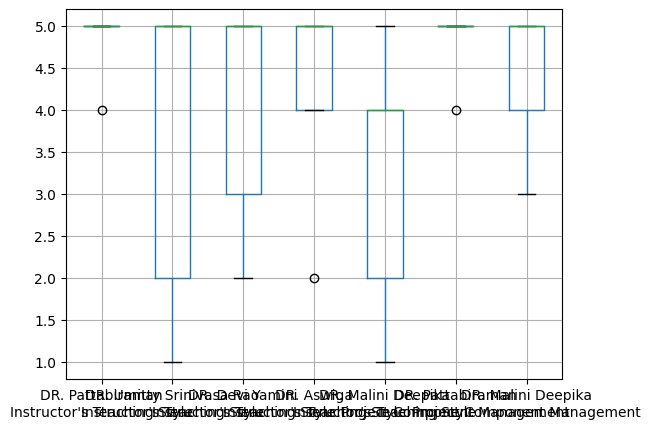

In [ ]:
ratings.head().boxplot()

In [ ]:
import pandas as pd

# Read the dataset from the file
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback.csv', index_col=0)

# Function to standardize each row
def standardize(row):
    try:
        new_row = ((row - row.mean()) / (row.max() - row.min()))
    except ZeroDivisionError:
        new_row = row
    return new_row

# Apply the standardize function to the relevant columns
ratings_std = ratings.iloc[:, 3:].apply(standardize, axis=1)
ratings_std.head(5)


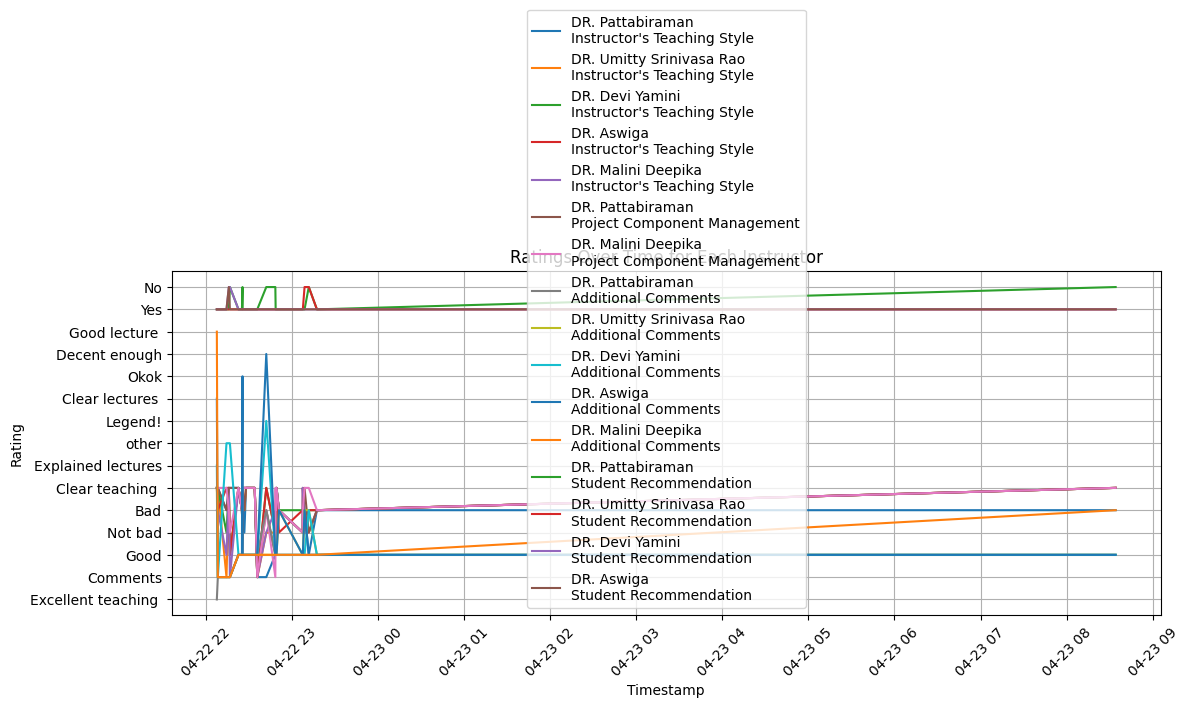

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from the file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback.csv')

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract unique instructors
instructors = df.columns[3:-1]

# Plot ratings over time for each instructor
plt.figure(figsize=(12, 6))
for instructor in instructors:
    instructor_df = df[['Timestamp', instructor]].dropna()
    plt.plot(instructor_df['Timestamp'], instructor_df[instructor], label=instructor)

plt.title('Ratings Over Time for Each Instructor')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Read the dataset from the file
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback.csv', index_col=0)

# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = ratings.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Compute cosine similarity
cos_item_similarity = cosine_similarity(numeric_ratings.T)

# Convert to DataFrame and adjust scale for better visualization
cos_item_similarity_df = pd.DataFrame(cos_item_similarity, index=numeric_ratings.columns, columns=numeric_ratings.columns)
s = cos_item_similarity_df.select_dtypes(include=[np.number]) * 10
cos_item_similarity_df[s.columns] = s

# Display the modified DataFrame
cos_item_similarity_df.head()


,DR. Umitty Srinivasa Rao\nInstructor's Teaching Style,DR. Devi Yamini\nInstructor's Teaching Style,DR. Aswiga\nInstructor's Teaching Style,DR. Malini Deepika\nInstructor's Teaching Style,DR. Pattabiraman\nProject Component Management,DR. Malini Deepika\nProject Component Management,DR. Pattabiraman\nAdditional Comments,DR. Umitty Srinivasa Rao\nAdditional Comments,DR. Devi Yamini\nAdditional Comments,DR. Aswiga\nAdditional Comments,DR. Malini Deepika\nAdditional Comments,DR. Pattabiraman\nStudent Recommendation,DR. Umitty Srinivasa Rao\nStudent Recommendation,DR. Devi Yamini\nStudent Recommendation,DR. Aswiga\nStudent Recommendation,DR. Malini Deepika\nStudent Recommendation
DR. Umitty Srinivasa Rao\nInstructor's Teaching Style,10.000000,9.892705,9.755048,9.920635,9.769179,9.713549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DR. Devi Yamini\nInstructor's Teaching Style,9.892705,10.000000,9.936524,9.892705,9.819872,9.833216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DR. Aswiga\nInstructor's Teaching Style,9.755048,9.936524,10.000000,9.830815,9.793545,9.841695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DR. Malini Deepika\nInstructor's Teaching Style,9.920635,9.892705,9.830815,10.000000,9.693887,9.676332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DR. Pattabiraman\nProject Component Management,9.769179,9.819872,9.793545,9.693887,10.000000,9.868258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Display the column names in the dataset
print(ratings.columns)


Index(['NAME', 'Year', 'DR. Pattabiraman\nInstructor's Teaching Style',
       'DR. Umitty Srinivasa Rao\nInstructor's Teaching Style',
       'DR. Devi Yamini\nInstructor's Teaching Style',
       'DR. Aswiga\nInstructor's Teaching Style',
       'DR. Malini Deepika\nInstructor's Teaching Style',
       'DR. Pattabiraman\nProject Component Management',
       'DR. Malini Deepika\nProject Component Management',
       'DR. Pattabiraman\nAdditional Comments',
       'DR. Umitty Srinivasa Rao\nAdditional Comments',
       'DR. Devi Yamini\nAdditional Comments',
       'DR. Aswiga\nAdditional Comments',
       'DR. Malini Deepika\nAdditional Comments',
       'DR. Pattabiraman\nStudent Recommendation',
       'DR. Umitty Srinivasa Rao\nStudent Recommendation',
       'DR. Devi Yamini\nStudent Recommendation',
       'DR. Aswiga\nStudent Recommendation',
       'DR. Malini Deepika\nStudent Recommendation'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Read the dataset from the file
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback.csv', index_col=0)

# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = ratings.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Compute cosine similarity
cos_item_similarity = cosine_similarity(numeric_ratings.T)

# Convert to DataFrame and adjust scale for better visualization
cos_item_similarity_df = pd.DataFrame(cos_item_similarity, index=numeric_ratings.columns, columns=numeric_ratings.columns)
s = cos_item_similarity_df.select_dtypes(include=[np.number]) * 10
cos_item_similarity_df[s.columns] = s

# Print each column of the DataFrame
for column in cos_item_similarity_df.columns:
    print(cos_item_similarity_df[column])


DR. Umitty Srinivasa Rao\nInstructor's Teaching Style    10.000000
DR. Devi Yamini\nInstructor's Teaching Style              9.892705
DR. Aswiga\nInstructor's Teaching Style                   9.755048
DR. Malini Deepika\nInstructor's Teaching Style           9.920635
DR. Pattabiraman\nProject Component Management            9.769179
DR. Malini Deepika\nProject Component Management          9.713549
DR. Pattabiraman\nAdditional Comments                     0.000000
DR. Umitty Srinivasa Rao\nAdditional Comments             0.000000
DR. Devi Yamini\nAdditional Comments                      0.000000
DR. Aswiga\nAdditional Comments                           0.000000
DR. Malini Deepika\nAdditional Comments                   0.000000
DR. Pattabiraman\nStudent Recommendation                  0.000000
DR. Umitty Srinivasa Rao\nStudent Recommendation          0.000000
DR. Devi Yamini\nStudent Recommendation                   0.000000
DR. Aswiga\nStudent Recommendation                        0.00

In [ ]:
cos_similar_prof.sum().sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
print(cos_similar_prof.shape)
print(cos_similar_prof.head())


(0, 0)
Empty DataFrame
Columns: []
Index: []


**Trying Pearson Method Correlation**

In [ ]:
# Read the dataset from the file
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback.csv', index_col=0)

# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = ratings.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Compute Pearson correlation
pearson_item_similarity = numeric_ratings.corr(method='pearson')

# Convert to DataFrame and adjust scale for better visualization
pearson_item_similarity_df = pd.DataFrame(pearson_item_similarity, index=numeric_ratings.columns, columns=numeric_ratings.columns)
s = pearson_item_similarity_df.select_dtypes(include=[np.number]) * 10
pearson_item_similarity_df[s.columns] = s

pearson_item_similarity_df.head()


,DR. Umitty Srinivasa Rao\nInstructor's Teaching Style,DR. Devi Yamini\nInstructor's Teaching Style,DR. Aswiga\nInstructor's Teaching Style,DR. Malini Deepika\nInstructor's Teaching Style,DR. Pattabiraman\nProject Component Management,DR. Malini Deepika\nProject Component Management,DR. Pattabiraman\nAdditional Comments,DR. Umitty Srinivasa Rao\nAdditional Comments,DR. Devi Yamini\nAdditional Comments,DR. Aswiga\nAdditional Comments,DR. Malini Deepika\nAdditional Comments,DR. Pattabiraman\nStudent Recommendation,DR. Umitty Srinivasa Rao\nStudent Recommendation,DR. Devi Yamini\nStudent Recommendation,DR. Aswiga\nStudent Recommendation,DR. Malini Deepika\nStudent Recommendation
DR. Umitty Srinivasa Rao\nInstructor's Teaching Style,10.000000,8.552790,6.499110,9.000000,6.662542,5.947519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DR. Devi Yamini\nInstructor's Teaching Style,8.552790,10.000000,8.878129,8.552790,6.720672,7.133198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DR. Aswiga\nInstructor's Teaching Style,6.499110,8.878129,10.000000,7.629390,6.243460,7.280803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DR. Malini Deepika\nInstructor's Teaching Style,9.000000,8.552790,7.629390,10.000000,5.503839,5.406836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DR. Pattabiraman\nProject Component Management,6.662542,6.720672,6.243460,5.503839,10.000000,7.679923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = ratings.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cos_item_similarity = cosine_similarity(numeric_ratings.T)


In [ ]:
import numpy as np

# Convert to DataFrame and adjust scale for better visualization
cos_item_similarity_df = pd.DataFrame(cos_item_similarity, index=numeric_ratings.columns, columns=numeric_ratings.columns)
s = cos_item_similarity_df.select_dtypes(include=[np.number]) * 10
cos_item_similarity_df[s.columns] = s


In [ ]:
def get_cos_similar_prof(prof_name, student_rating):
    similar_score = cos_item_similarity_df[prof_name] * (student_rating - 2.5) * 4  # Scale for 100%
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score


In [ ]:
# List of professors and their ratings
leslie_lover = [("DR. Umitty Srinivasa Rao\nInstructor's Teaching Style", 5),
                ("DR. Aswiga\nInstructor's Teaching Style", 3),
                ("DR. Devi Yamini\nInstructor's Teaching Style", 3)]

# Create an empty DataFrame to store recommendations
recommendations_df = pd.DataFrame()

# Generate recommendations for each professor
for prof, rating in leslie_lover:
    recommendations_df[prof] = get_cos_similar_prof(prof, rating)


In [ ]:
# Drop any rows with missing values
df.dropna(inplace=True)


In [ ]:
# Collaborative filtering method
def collaborative_filtering(df, user_name):
    # Filter dataframe to include only the user's ratings
    user_ratings = df[df.index == user_name].drop(columns=['Year'])

    # Calculate the mean ratings for each instructor
    instructor_means = df.groupby(df.index).mean()

    # Calculate similarity between the user and other students
    similarity = df.apply(lambda row: user_ratings.corrwith(row), axis=1)

    # Sort the similarity scores in descending order
    similarity_sorted = similarity.sort_values(ascending=False)

    # Get the top similar users
    top_similar_users = similarity_sorted.head(5)

    # Filter the dataframe to include ratings from top similar users
    similar_user_ratings = df.loc[top_similar_users.index]

    # Calculate weighted average ratings based on similarity scores
    weighted_ratings = similar_user_ratings.multiply(top_similar_users, axis=0).sum() / top_similar_users.sum()

    # Exclude the instructors the user has already rated
    unrated_instructors = weighted_ratings[user_ratings.isna().any()].dropna()

    # Sort the recommendations in descending order
    recommended_instructors = unrated_instructors.sort_values(ascending=False)

    return recommended_instructors


In [ ]:
print(df.dtypes)


Timestamp                                                datetime64[ns]
NAME                                                             object
Year                                                             object
DR. Pattabiraman\nInstructor's Teaching Style                     int64
DR. Umitty Srinivasa Rao\nInstructor's Teaching Style             int64
DR. Devi Yamini\nInstructor's Teaching Style                      int64
DR. Aswiga\nInstructor's Teaching Style                           int64
DR. Malini Deepika\nInstructor's Teaching Style                   int64
DR. Pattabiraman\nProject Component Management                    int64
DR. Malini Deepika\nProject Component Management                  int64
DR. Pattabiraman\nAdditional Comments                            object
DR. Umitty Srinivasa Rao\nAdditional Comments                    object
DR. Devi Yamini\nAdditional Comments                             object
DR. Aswiga\nAdditional Comments                                 

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column, df[column].unique())


NAME ['Pavithra ' 'Jasmitha Manali' 'Harish ' 'Sheela' 'Kiran'
 'Venna Divya Reddy ' 'Sathvik Guptha A ' 'T MAHENDRA BABU ' 'Hemanth '
 'Rohit ' 'Soundarya ' 'Ashika ' 'Tejaswani' 'Darun ' 'Likhil'
 'A. M. Harshitha' 'Divyanshu Singh' 'G Tarun ' 'Gangothri K C'
 'D LAKSHMI PRIYA ' 'N thanusha ' 'VALLABH' 'A Rohith Kumar' 'Dharun'
 'Sharma' 'Riya' 'K. Siva Nandini ' 'S.Bindusri']
Year ['2nd' '2nd year ']
DR. Pattabiraman
Additional Comments ['Excellent teaching ' 'Comments' 'Good' 'Not bad' 'Bad']
DR. Umitty Srinivasa Rao
Additional Comments ['Clear teaching ' 'Comments' 'Good' 'Bad']
DR. Devi Yamini
Additional Comments ['Explained lectures' 'Comments' 'other' 'Good' 'Legend!' 'Bad']
DR. Aswiga
Additional Comments ['Clear lectures ' 'Comments' 'Good' 'Okok' 'Decent enough' 'Bad']
DR. Malini Deepika
Additional Comments ['Good lecture ' 'Comments' 'Good' 'Bad']
DR. Pattabiraman
Student Recommendation ['Yes' 'No']
DR. Umitty Srinivasa Rao
Student Recommendation ['Yes' 'No']
DR. Devi Yamini

In [ ]:
# Extract the subheadings (column names)
subheadings = pearson_item_similarity_df.columns

# Print the subheadings
for subheading in subheadings:
    print(subheading)


DR. Umitty Srinivasa Rao
Instructor's Teaching Style
DR. Devi Yamini
Instructor's Teaching Style
DR. Aswiga
Instructor's Teaching Style
DR. Malini Deepika
Instructor's Teaching Style
DR. Pattabiraman
Project Component Management
DR. Malini Deepika
Project Component Management
DR. Pattabiraman
Additional Comments
DR. Umitty Srinivasa Rao
Additional Comments
DR. Devi Yamini
Additional Comments
DR. Aswiga
Additional Comments
DR. Malini Deepika
Additional Comments
DR. Pattabiraman
Student Recommendation
DR. Umitty Srinivasa Rao
Student Recommendation
DR. Devi Yamini
Student Recommendation
DR. Aswiga
Student Recommendation
DR. Malini Deepika
Student Recommendation


In [ ]:
# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = df.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)


In [ ]:
# Calculate Pearson correlation coefficients
pearson_corr = numeric_ratings.corr()


In [ ]:
def get_pearson_similar_prof(professor, rating):
    # Get Pearson correlation coefficients for the specified professor
    similar_prof = pearson_corr[professor]
    # Sort professors based on correlation coefficients
    similar_prof = similar_prof.sort_values(ascending=False)
    # Exclude the specified professor from the list
    similar_prof = similar_prof.drop(professor)
    return similar_prof


# **Trying Machine Learning Algorithms**

In [ ]:
import pandas as pd

# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback.csv', index_col=0)

# Display the first few rows to understand the structure of the data
print(data.head())


                               NAME       Year  \
Timestamp                                        
4-22-2024 22:07:51        Pavithra         2nd   
4-22-2024 22:08:32  Jasmitha Manali  2nd year    
4-22-2024 22:14:34          Harish         2nd   
4-22-2024 22:16:13           Sheela        2nd   
4-22-2024 22:16:57            Kiran        2nd   

                    DR. Pattabiraman\nInstructor's Teaching Style  \
Timestamp                                                           
4-22-2024 22:07:51                                              5   
4-22-2024 22:08:32                                              5   
4-22-2024 22:14:34                                              4   
4-22-2024 22:16:13                                              5   
4-22-2024 22:16:57                                              5   

                    DR. Umitty Srinivasa Rao\nInstructor's Teaching Style  \
Timestamp                                                                   
4-22-2024 2

In [ ]:
import torch

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162998 sha256=3c32b174aeb5e01b512f87557ce69ca4dd20ad209f98e10e713a08685a726ae1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate

***Non-Negative Matrix Factorisation Method Implementation***

In [ ]:
algo = NMF()
cross_validate(algo,data,measures=['RMSE','MAE'],cv=5,verbose=True)


Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1236  0.1242  0.1197  0.1282  0.1167  0.1225  0.0040  
MAE (testset)     0.0859  0.0865  0.0784  0.0773  0.0778  0.0812  0.0041  
Fit time          1.20    1.17    1.05    1.58    2.20    1.44    0.42    
Test time         0.03    0.03    0.04    0.05    0.04    0.04    0.01    


{'fit_time': (1.1982011795043945,
  1.1716597080230713,
  1.0488684177398682,
  1.5804028511047363,
  2.2045788764953613),
 'test_mae': array([0.08588265, 0.08651438, 0.07841302, 0.07731138, 0.07782504]),
 'test_rmse': array([0.12358544, 0.1242452 , 0.11974782, 0.12822826, 0.1166811 ]),
 'test_time': (0.027424335479736328,
  0.02645111083984375,
  0.03963065147399902,
  0.053075551986694336,
  0.03890419006347656)}

***KNN Algorithm Implementation:***

In [ ]:
from surprise import KNNBasic
algo = KNNBasic()
cross_validate(algo, data, measures=['RMSE', 'MAE'],cv=5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0698  0.0600  0.0474  0.0492  0.0976  0.0648  0.0183  
MAE (testset)     0.0035  0.0030  0.0013  0.0028  0.0051  0.0031  0.0012  
Fit time          0.01    0.02    0.02    0.01    0.02    0.02    0.00    
Test time         0.17    0.18    0.27    0.17    0.17    0.19    0.04    


{'fit_time': (0.011974096298217773,
  0.016121864318847656,
  0.01509857177734375,
  0.012859821319580078,
  0.02047586441040039),
 'test_mae': array([0.00353548, 0.00301685, 0.00128942, 0.00276363, 0.00507402]),
 'test_rmse': array([0.06975315, 0.05997684, 0.047358  , 0.04921564, 0.09763054]),
 'test_time': (0.16951751708984375,
  0.18103790283203125,
  0.2654561996459961,
  0.17008447647094727,
  0.17263245582580566)}

***Singluar Value Decomposition Implementation***

In [ ]:
from surprise import SVD
algo = SVD()
cross_validate(algo, data, measures=['RMSE','MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1792  0.1679  0.1822  0.1777  0.1781  0.1770  0.0048  
MAE (testset)     0.0959  0.0922  0.0972  0.0924  0.0983  0.0952  0.0025  
Fit time          1.01    1.10    0.98    1.22    2.07    1.27    0.40    
Test time         0.12    0.03    0.03    0.04    0.04    0.05    0.03    


{'fit_time': (1.0121300220489502,
  1.0982019901275635,
  0.975663423538208,
  1.221648931503296,
  2.0666513442993164),
 'test_mae': array([0.09592421, 0.09218976, 0.09715717, 0.09243315, 0.0982826 ]),
 'test_rmse': array([0.17915837, 0.16791067, 0.18215573, 0.17768694, 0.17812808]),
 'test_time': (0.11962652206420898,
  0.025217056274414062,
  0.027360200881958008,
  0.04417586326599121,
  0.04382944107055664)}

***Plotting Comparsion between KNN and NVM***

In [ ]:
import matplotlib.pyplot as plt

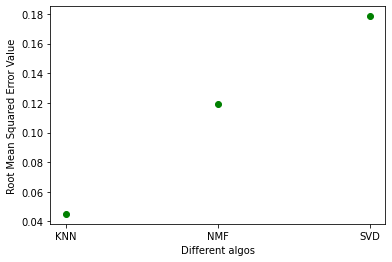

In [ ]:
rmse = [0.0451, 0.1193,0.1784]
algos = ['KNN','NMF','SVD']
plt.plot(algos, rmse, 'go',)
plt.xlabel("Different algos")
plt.ylabel("Root Mean Squared Error Value")
plt.show()

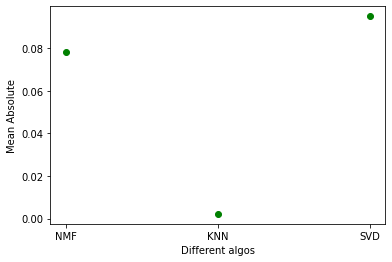

In [ ]:
mae = [0.0784, 0.0022 ,0.0951]
algos = ['NMF','KNN','SVD']
plt.plot(algos, mae, 'go',)
plt.xlabel("Different algos")
plt.ylabel("Mean Absolute")
plt.show()